In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
seed=42
np.random.seed(seed)

In [3]:
trainpath = "./trainDdosLabelNumeric.csv"

## Load data

In [4]:
def load(path):
    return pandas.read_csv(trainpath)

In [5]:
data = load(trainpath)

In [6]:
print (data.shape)

(10000, 79)


In [7]:
print (data.head())

    Protocol   Flow Duration   Total Fwd Packets   Total Backward Packets  \
0          6               1                   2                        0   
1          6           71271                   6                        7   
2          6               2                   1                        2   
3          6               1                   2                        0   
4         17           20623                   2                        2   

   Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                          0.0                           0.0   
1                        874.0                        3745.0   
2                         31.0                          12.0   
3                         37.0                           0.0   
4                         90.0                         122.0   

    Fwd Packet Length Max   Fwd Packet Length Min   Fwd Packet Length Mean  \
0                     0.0                     0.0                 0.000000

In [8]:
print (data.columns)

Index([' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow_Bytes', 'Flow_Packets',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd_Packets', 'Bwd_Packets',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
 

## Pre-elaborate data

In [9]:
def preElaborationData(data, cols):
    for c in cols:
        print(data[c].describe(include='all'))
        print("\n")

In [10]:
cols = list (data.columns.values)

In [11]:
preElaborationData(data,cols)

count    10000.000000
mean        12.372700
std          5.495017
min          0.000000
25%          6.000000
50%         17.000000
75%         17.000000
max         17.000000
Name:  Protocol, dtype: float64


count    1.000000e+04
mean     5.052362e+06
std      2.086003e+07
min      1.000000e+00
25%      1.000000e+00
50%      4.700000e+01
75%      3.113775e+04
max      1.199499e+08
Name:  Flow Duration, dtype: float64


count    10000.000000
mean         4.974100
std         17.905778
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        899.000000
Name:  Total Fwd Packets, dtype: float64


count    10000.000000
mean         3.349400
std         26.611075
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max       1543.000000
Name:  Total Backward Packets, dtype: float64


count    10000.000000
mean       832.031800
std       2049.949291
min          0.000000
25%         12.000000
50%        458.000000


count    10000.000000
mean        32.782734
std        123.568815
min          0.000000
25%          0.000000
50%          0.000000
75%         14.433757
max       1052.315670
Name:  Packet Length Std, dtype: float64


count    1.000000e+04
mean     1.634243e+04
std      9.071925e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.083333e+02
max      1.107368e+06
Name:  Packet Length Variance, dtype: float64


count    10000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: FIN Flag Count, dtype: float64


count    10000.000000
mean         0.001300
std          0.036034
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name:  SYN Flag Count, dtype: float64


count    10000.000000
mean         0.055800
std          0.229547
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         

## Drop useless columns 

In [12]:
def removeColumns(data, cols):
    columns_to_remove=[]
    
    for c in cols:
        if ( data[c].max() == data[c].min()):
            columns_to_remove.append(c)
    
    data.drop(columns=columns_to_remove, inplace=True)
    return columns_to_remove

In [13]:
removedColumns = removeColumns(data, cols)

In [14]:
print (data.shape)

(10000, 67)


In [15]:
print(len(removedColumns))

12


In [16]:
print(data)

       Protocol   Flow Duration   Total Fwd Packets   Total Backward Packets  \
0             6               1                   2                        0   
1             6           71271                   6                        7   
2             6               2                   1                        2   
3             6               1                   2                        0   
4            17           20623                   2                        2   
...         ...             ...                 ...                      ...   
9995         17               1                   2                        0   
9996         17               2                   2                        0   
9997         17              47                   2                        0   
9998         17              49                   2                        0   
9999         17              48                   2                        0   

      Total Length of Fwd Packets   Tot

## Pre-elaborate data histogram label

In [17]:
def preElaborationClass(data, col):
    isto = data.groupby(col).count()
    print (isto.iloc[: , 2])
    data[col].plot(kind='hist')

Label
0    3000
1    2000
2    2000
3    2000
4    1000
Name:  Total Fwd Packets, dtype: int64


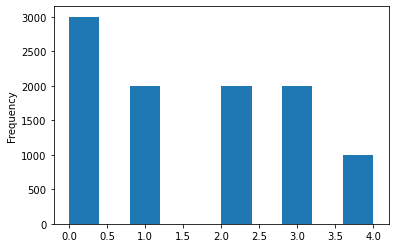

In [18]:
preElaborationClass(data, 'Label')

E:\anakonda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


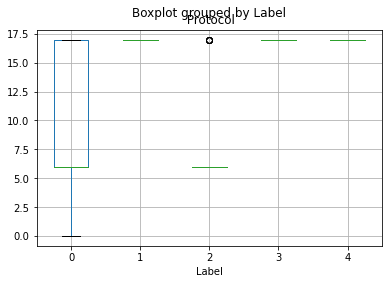

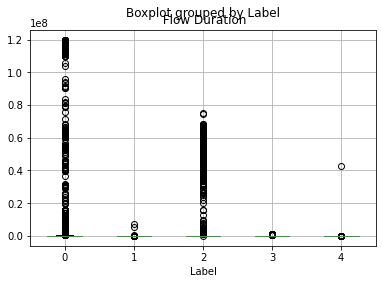

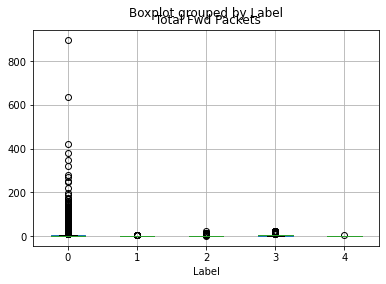

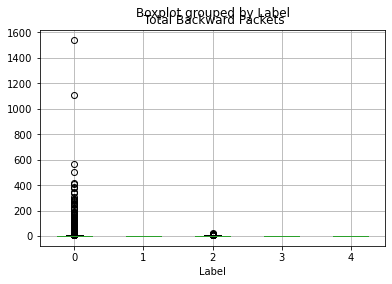

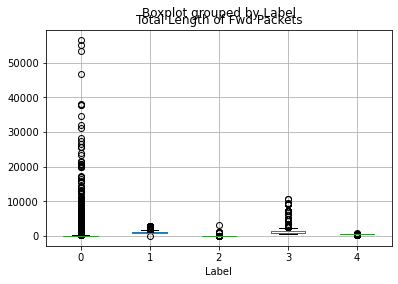

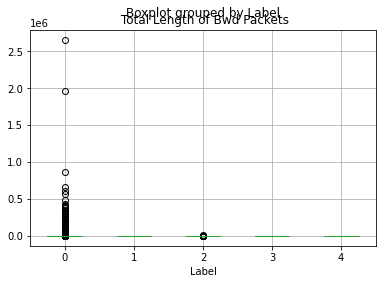

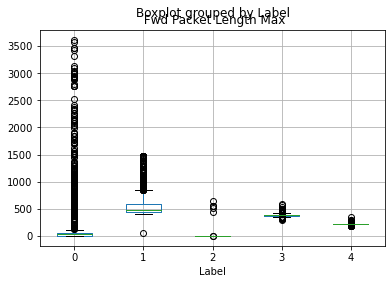

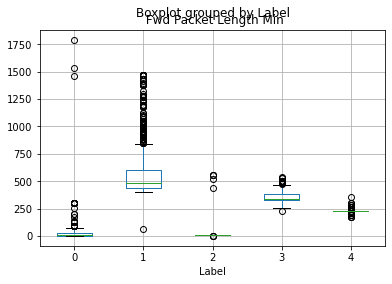

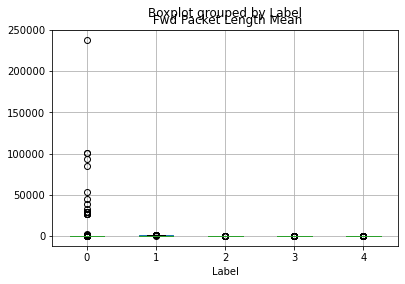

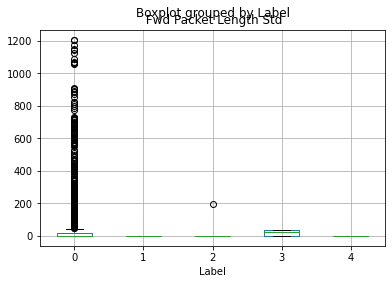

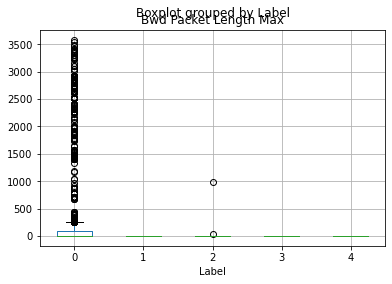

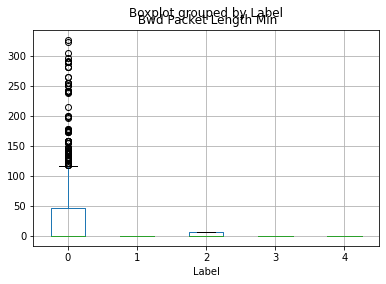

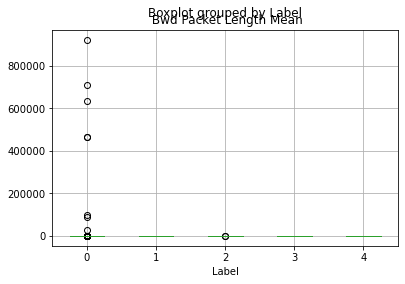

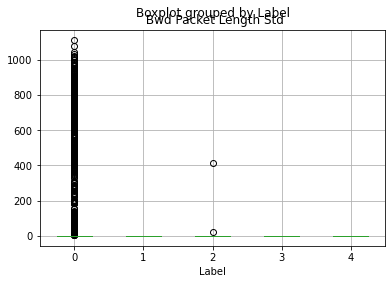

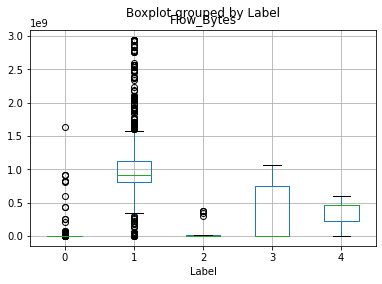

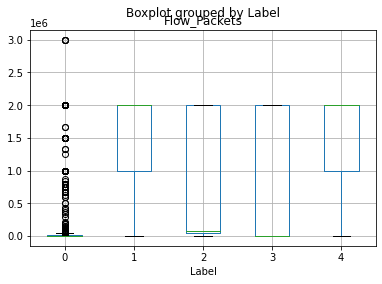

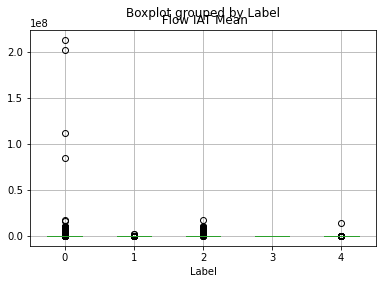

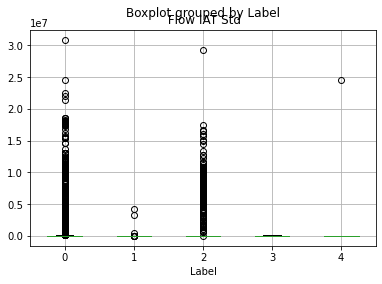

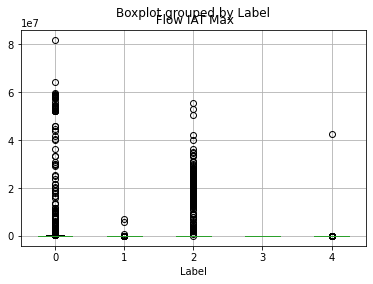

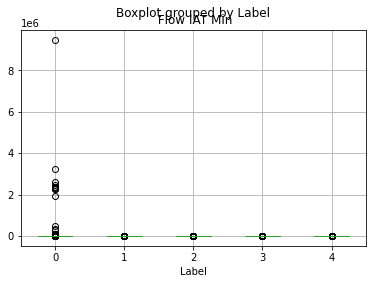

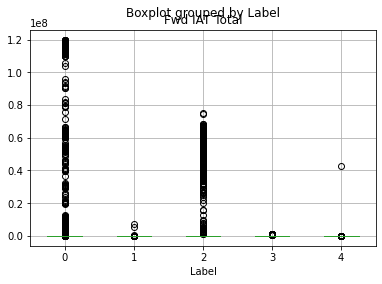

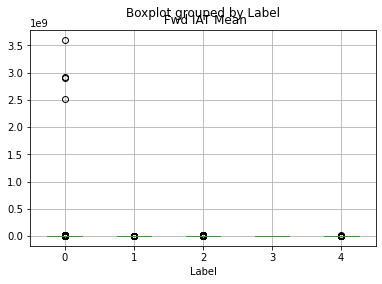

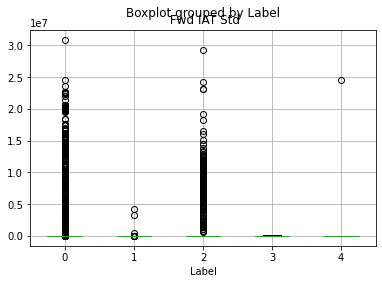

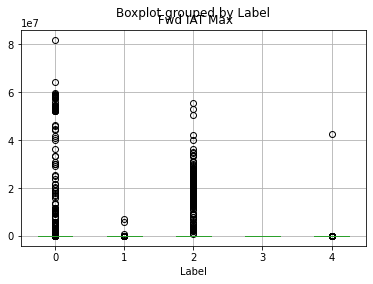

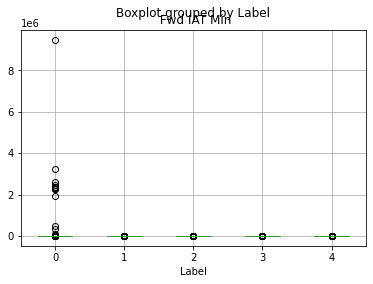

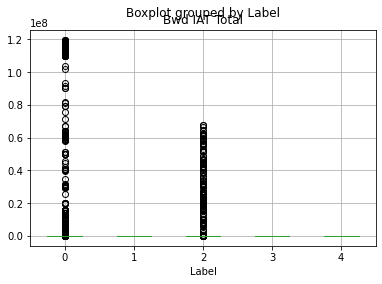

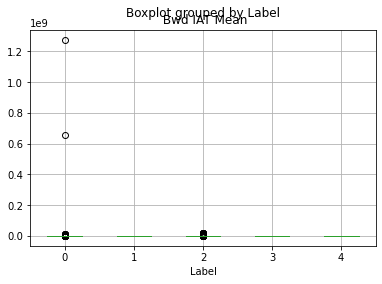

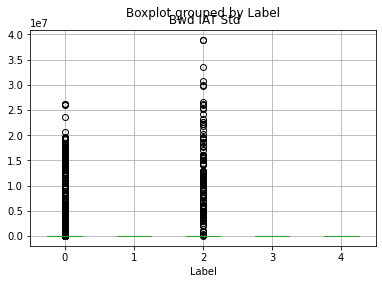

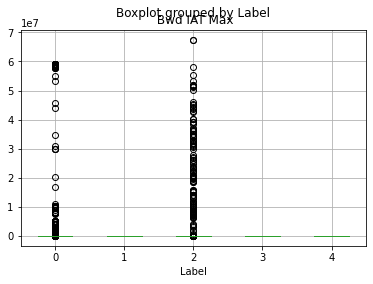

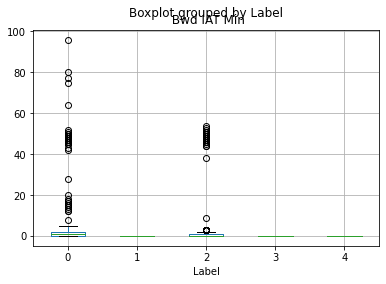

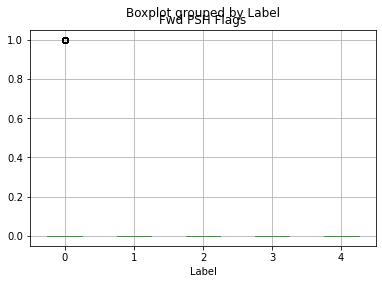

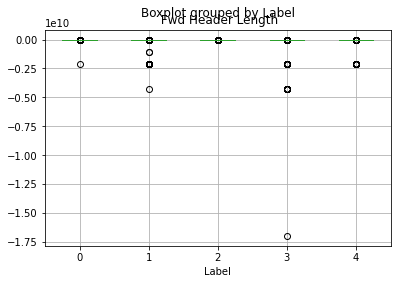

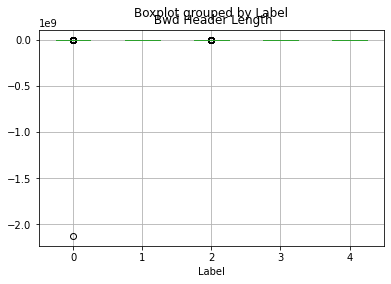

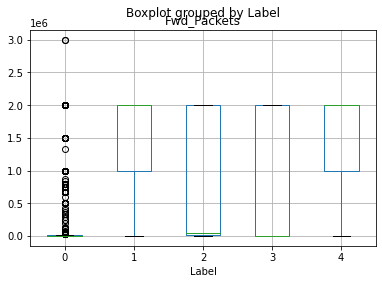

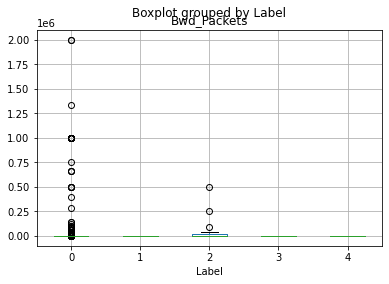

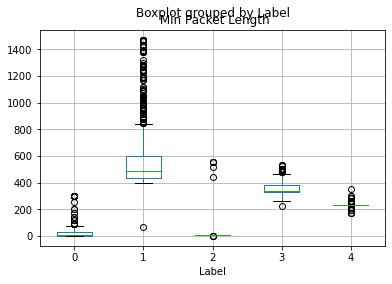

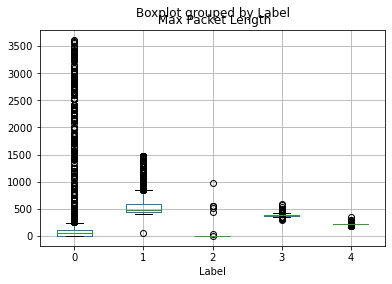

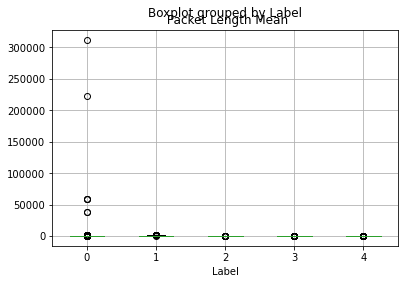

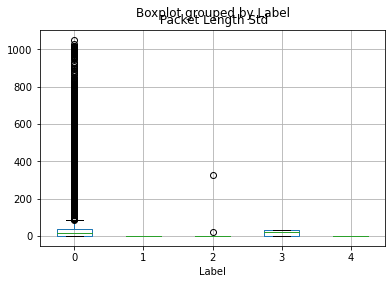

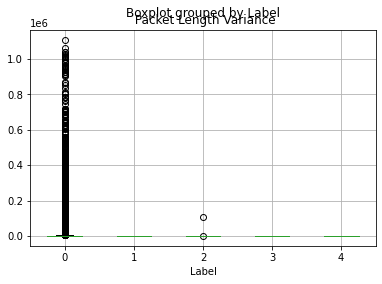

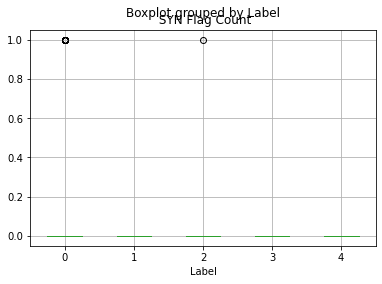

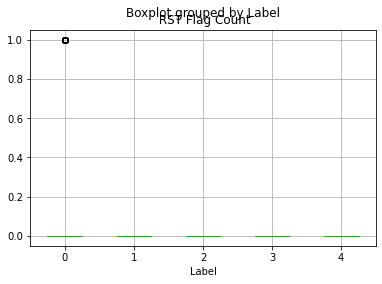

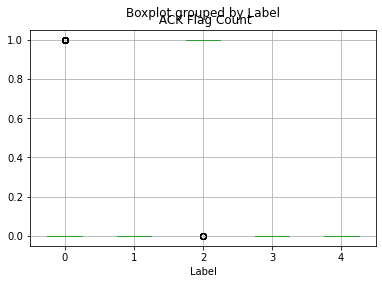

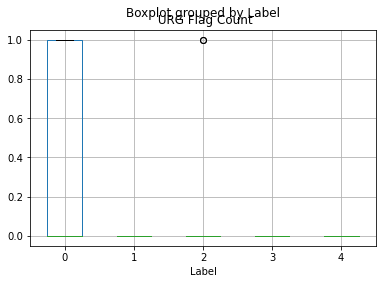

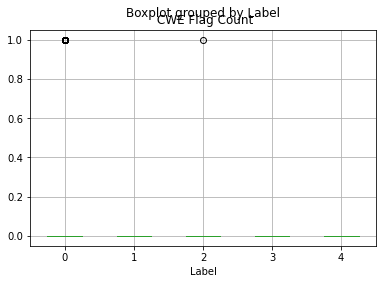

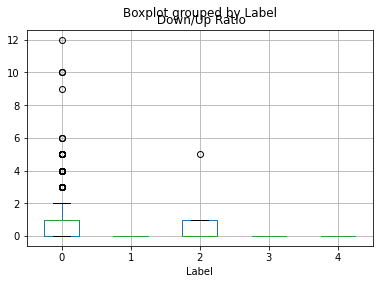

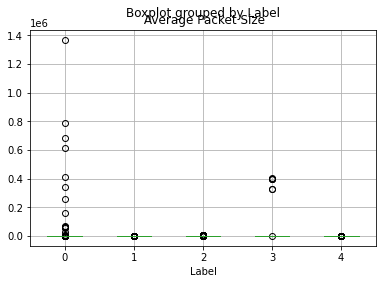

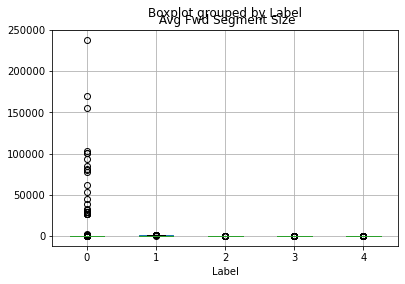

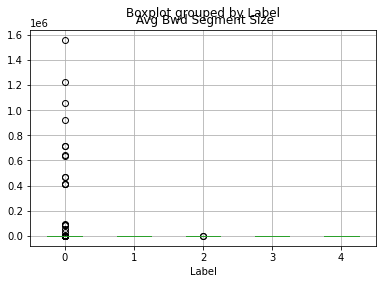

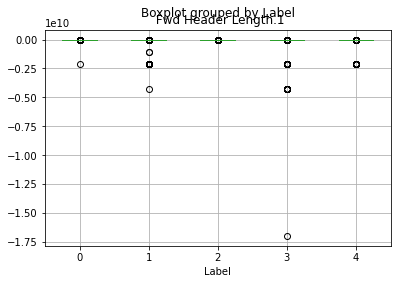

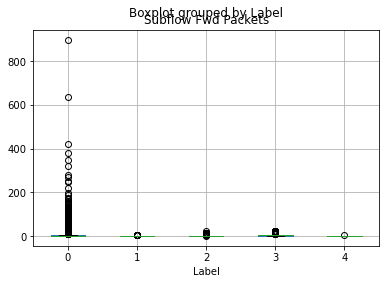

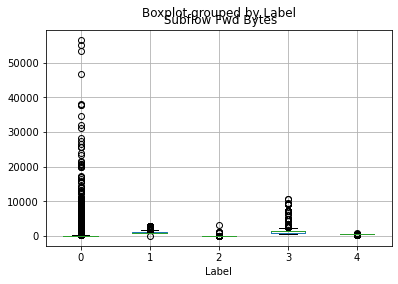

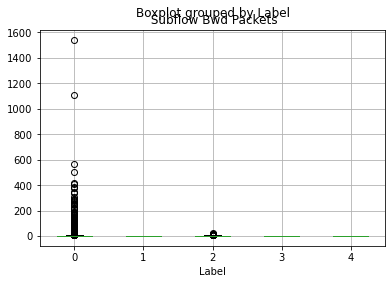

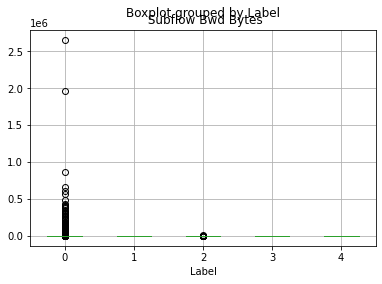

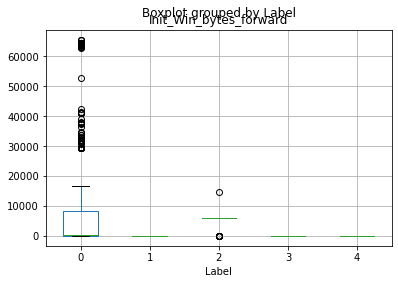

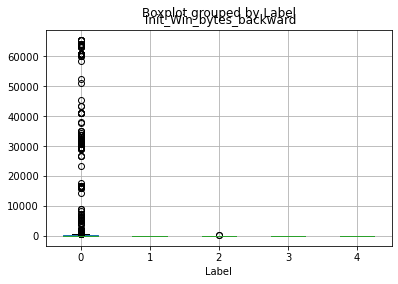

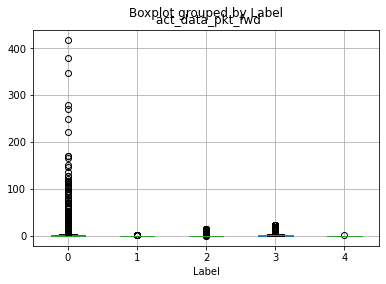

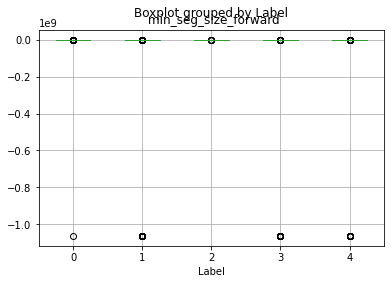

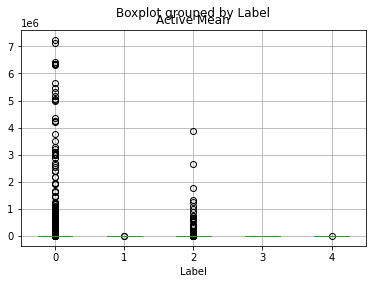

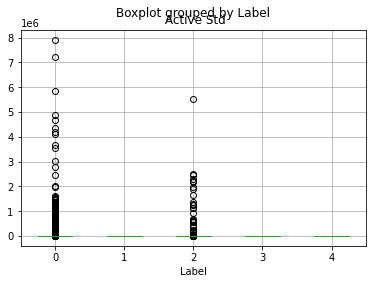

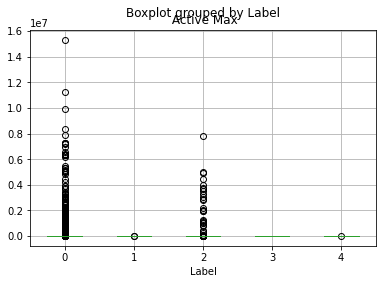

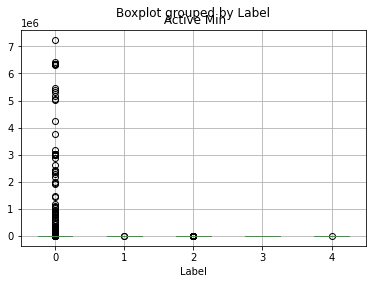

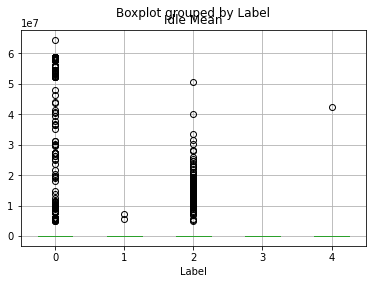

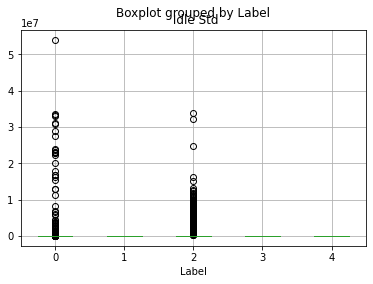

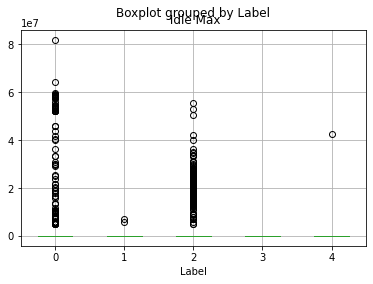

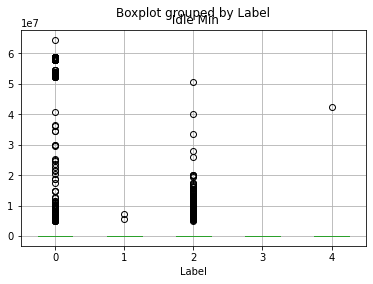

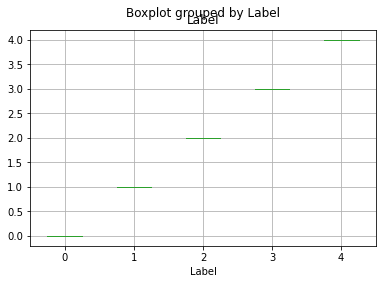

In [19]:
cols = list (data.columns.values)
for i in range(len(cols)):
    boxplot = data.boxplot(column=cols[i], by="Label")

## Feature evaluation (Mutual Info)

In [20]:
def mutualInfoRank(data,independentList,label):
    from sklearn.feature_selection import mutual_info_classif
    res = dict(zip(independentList, mutual_info_classif(data[independentList], data[label],discrete_features=False, random_state=seed) ))
    sorted_x = sorted(res.items(), key=lambda kv: kv[1], reverse=True)
    return dict(sorted_x)

In [21]:
def topFeatureSelect(rank, N):
    if isinstance(rank, dict):
        toplist = list (rank.keys())
        toplist = toplist[:N]
    elif isinstance(rank, list):
        toplist = rank[:N]
    
    return toplist

In [22]:
independentCols = list (data.columns.values)
independentCols.remove('Label')
rankMI = mutualInfoRank(data, independentCols, 'Label') 
print (rankMI)

{' Average Packet Size': 1.3934006378924466, 'Total Length of Fwd Packets': 1.3902809876637139, ' Subflow Fwd Bytes': 1.3887076352069208, ' Avg Fwd Segment Size': 1.366270300291472, ' Fwd Packet Length Mean': 1.3656162206600995, 'Flow_Bytes': 1.3613799868669945, ' Max Packet Length': 1.3535445478071175, ' Min Packet Length': 1.348555021000605, ' Packet Length Mean': 1.3445635380055723, ' Fwd Packet Length Min': 1.3433241110286873, ' Fwd Packet Length Max': 1.3259154236594968, 'Init_Win_bytes_forward': 0.7747075413798603, ' Flow Duration': 0.6485522543748727, ' Flow IAT Mean': 0.6473879126265007, 'Flow_Packets': 0.6471338253158803, ' Flow IAT Max': 0.6385838184357386, 'Fwd_Packets': 0.6382552831296682, ' Flow IAT Std': 0.6055254478045582, ' Fwd Header Length': 0.5517727816731264, ' Fwd Header Length.1': 0.5445200186011923, 'Fwd IAT Total': 0.5168617660311243, ' Fwd IAT Max': 0.5093666320876884, ' Protocol': 0.50800505960873, ' Fwd IAT Mean': 0.5039607303207718, ' Packet Length Variance'

In [25]:
toplist = topFeatureSelect(rankMI, 10)
toplist.append('Label')
print(toplist)

[' Average Packet Size', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow_Bytes', ' Max Packet Length', ' Min Packet Length', ' Packet Length Mean', ' Fwd Packet Length Min', 'Label']


In [26]:
selectedMIData = data.loc[: , toplist]

In [27]:
print(selectedMIData.shape)

(10000, 11)


In [28]:
print(selectedMIData.head())

    Average Packet Size  Total Length of Fwd Packets   Subflow Fwd Bytes  \
0              0.000000                          0.0                   0   
1            355.307692                        874.0                 874   
2             24.666667                         31.0                  31   
3             34.000000                         37.0                  37   
4             64.250000                         90.0                  90   

    Avg Fwd Segment Size   Fwd Packet Length Mean    Flow_Bytes  \
0               0.000000                 0.000000  0.000000e+00   
1             145.666667               145.666667  6.480897e+04   
2              31.000000                31.000000  2.150000e+07   
3              18.500000                18.500000  3.700000e+07   
4              45.000000                45.000000  1.027978e+04   

    Max Packet Length   Min Packet Length   Packet Length Mean  \
0                 0.0                 0.0             0.000000   
1       

In [29]:
print (selectedMIData.columns)

Index([' Average Packet Size', 'Total Length of Fwd Packets',
       ' Subflow Fwd Bytes', ' Avg Fwd Segment Size',
       ' Fwd Packet Length Mean', 'Flow_Bytes', ' Max Packet Length',
       ' Min Packet Length', ' Packet Length Mean', ' Fwd Packet Length Min',
       'Label'],
      dtype='object')


## Feature evaluation (Info gain)

In [30]:
def entropyClass(label, b):
    from scipy.stats import entropy
    
    Pclass = []
    val = label.value_counts()

    for i in val:
        Pclass.append(i/label.shape[0]) # P(ci)

    return entropy(Pclass,base=b)

In [31]:
def infoGain(data, label):
    from scipy.stats import entropy

    df = pandas.concat([data, label], axis=1)
    nameFeature = df.columns[0]
    nameLabel = df.columns[1]

    #Restituisce una serie contenente i conteggi di valori univoci.
    valData = data.value_counts()
    valLabel = label.value_counts()
    
    nclass = valLabel.index.size
    eC = entropyClass(label, nclass)

    P = []
    for i in valData.index: #Per ogni valore distinto
        internalList = []
        df1 =  df.loc[(df[nameFeature] == i)]
        for j in valLabel.index: #Per ogni classe distinta  
            df2 = df.loc[(df[nameFeature] == i) & (df[nameLabel] == j)]
            internalList.append (df2.shape[0] / df1.shape[0]) #Aggiungo la probabilità P(C="j"| data="i")
            
        P.append (entropy(internalList,base=nclass) * valData[i]) #Calcolo  H(C | data="i") * #esempi=i

    return eC - sum(P)/df.shape[0]

In [32]:
def giClassif(data,label):
    cols = list(data.columns.values)
    info=[]
    for c in cols:
        info.append(infoGain(data[c],label))
    return info

In [33]:
def giRank(data,independentList,label):
    res = dict(zip(independentList, giClassif(data[independentList], data[label]) ))
    sorted_x = sorted(res.items(), key=lambda kv: kv[1], reverse=True)
    print(res)
    print(sorted_x)
    return dict(sorted_x)

In [34]:
rankIG = giRank(data, independentCols, 'Label')

{' Protocol': 0.3130129861623333, ' Flow Duration': 0.4427004867276084, ' Total Fwd Packets': 0.19865369303797242, ' Total Backward Packets': 0.20875262472326717, 'Total Length of Fwd Packets': 0.8981629006375398, ' Total Length of Bwd Packets': 0.21940470296248493, ' Fwd Packet Length Max': 0.8490274818448392, ' Fwd Packet Length Min': 0.8435961794299788, ' Fwd Packet Length Mean': 0.873590279058079, ' Fwd Packet Length Std': 0.20381146504230063, 'Bwd Packet Length Max': 0.20954589630025533, ' Bwd Packet Length Min': 0.15397950400768923, ' Bwd Packet Length Mean': 0.20993940390453858, ' Bwd Packet Length Std': 0.0464164202554479, 'Flow_Bytes': 0.9403050309957606, 'Flow_Packets': 0.4543324349951007, ' Flow IAT Mean': 0.4518795162634388, ' Flow IAT Std': 0.42782931994560147, ' Flow IAT Max': 0.43444458428485744, ' Flow IAT Min': 0.11252122343380289, 'Fwd IAT Total': 0.3514424121618671, ' Fwd IAT Mean': 0.3502371649913585, ' Fwd IAT Std': 0.2263948286483829, ' Fwd IAT Max': 0.34859183722

In [35]:
toplistIG = topFeatureSelect(rankIG, 10)
print(toplistIG)

['Flow_Bytes', ' Average Packet Size', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Packet Length Mean', ' Fwd Packet Length Mean', ' Avg Fwd Segment Size', ' Max Packet Length', ' Fwd Packet Length Max', ' Min Packet Length']


## PCA

In [36]:
def pca(data):
    from sklearn.decomposition import PCA
    pca = PCA()
    pca.fit(data)
    
    list=[]
    for c in range(len(data.columns.values)):
        v="pc_"+str(c+1);
        list.append(v)
        
    return pca,list;

In [37]:
def applyPCA(x, pca, pcalist):
    principalComponents = pca.transform(x) #restituisce solo matrice di dati
    pcaData = pandas.DataFrame(data=principalComponents, columns=pcalist) 
    return pcaData

In [38]:
def selectPCAdata(pcaData, n):
    colsPca = list (pcaData.columns.values)
    listc = []
    for i in range(n):
        listc.append(colsPca[i])
    listc.append('Label')
    
    selectedPCAdata = pcaData.loc[: , listc]
    print (selectedPCAdata)

In [39]:
x = data.loc[: , independentCols]
pca,pcalist=pca(x)
pcaData=applyPCA(x,pca,pcalist)
pcaData.insert(loc=len(independentCols), column='Label', value=data['Label'], allow_duplicates =True) # Aggiungo label
print(pcaData.columns.values)
print(pcaData.head())
print(pcaData.shape)

['pc_1' 'pc_2' 'pc_3' 'pc_4' 'pc_5' 'pc_6' 'pc_7' 'pc_8' 'pc_9' 'pc_10'
 'pc_11' 'pc_12' 'pc_13' 'pc_14' 'pc_15' 'pc_16' 'pc_17' 'pc_18' 'pc_19'
 'pc_20' 'pc_21' 'pc_22' 'pc_23' 'pc_24' 'pc_25' 'pc_26' 'pc_27' 'pc_28'
 'pc_29' 'pc_30' 'pc_31' 'pc_32' 'pc_33' 'pc_34' 'pc_35' 'pc_36' 'pc_37'
 'pc_38' 'pc_39' 'pc_40' 'pc_41' 'pc_42' 'pc_43' 'pc_44' 'pc_45' 'pc_46'
 'pc_47' 'pc_48' 'pc_49' 'pc_50' 'pc_51' 'pc_52' 'pc_53' 'pc_54' 'pc_55'
 'pc_56' 'pc_57' 'pc_58' 'pc_59' 'pc_60' 'pc_61' 'pc_62' 'pc_63' 'pc_64'
 'pc_65' 'pc_66' 'Label']
           pc_1          pc_2           pc_3          pc_4          pc_5  \
0 -1.575375e+08  2.465755e+08   36416.495591 -3.269201e+06 -1.221653e+07   
1 -1.575230e+08  2.465192e+08   37698.454189 -3.250790e+06 -1.210690e+07   
2 -1.521068e+08  2.257800e+08  377369.817110 -3.201101e+06 -1.196026e+07   
3 -1.481905e+08  2.107832e+08  622906.386929 -3.153077e+06 -1.178586e+07   
4 -1.575363e+08  2.465711e+08   36861.969629 -3.266425e+06 -1.218850e+07   

       

In [40]:
selectPCAdata(pcaData, 10)

              pc_1          pc_2          pc_3          pc_4          pc_5  \
0    -1.575375e+08  2.465755e+08  3.641650e+04 -3.269201e+06 -1.221653e+07   
1    -1.575230e+08  2.465192e+08  3.769845e+04 -3.250790e+06 -1.210690e+07   
2    -1.521068e+08  2.257800e+08  3.773698e+05 -3.201101e+06 -1.196026e+07   
3    -1.481905e+08  2.107832e+08  6.229064e+05 -3.153077e+06 -1.178586e+07   
4    -1.575363e+08  2.465711e+08  3.686197e+04 -3.266425e+06 -1.218850e+07   
...            ...           ...           ...           ...           ...   
9995 -4.183706e+07 -1.964745e+08  7.296239e+06 -1.831775e+06 -6.885641e+06   
9996 -9.968794e+07  2.505316e+07  3.666468e+06 -2.549857e+06 -9.545006e+06   
9997 -1.550770e+08  2.371541e+08  1.911528e+05 -3.237333e+06 -1.209115e+07   
9998 -1.551775e+08  2.375389e+08  1.848484e+05 -3.238578e+06 -1.209576e+07   
9999 -1.551283e+08  2.373505e+08  1.879333e+05 -3.237969e+06 -1.209350e+07   

               pc_6           pc_7           pc_8           pc_

## Stratified K-fold CV

In [41]:
def stratifiedKfold(X, y, folds, seed):
    from sklearn.model_selection import StratifiedKFold  
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)
    #skf.get_n_splits(X, y)
    
    ListXTrain=[]
    ListXTest=[]
    ListYTrain=[]
    ListYTest=[]
    
    for train_index, test_index in skf.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        ListXTrain.append( X.iloc[train_index] )
        ListXTest.append ( X.iloc[test_index] )
        ListYTrain.append (y.iloc[train_index])
        ListYTest.append (y.iloc[test_index])
        
    return ListXTrain,ListXTest,ListYTrain,ListYTest

In [42]:
X=data.loc[:, independentCols];
y=data['Label']
folds=5
ListXTrain,ListXTest,ListYTrain,ListYTest=stratifiedKfold(X,y,folds, seed)

TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [   3    8   11 ... 9980 9981 9991]
TRAIN: [   0    2    3 ... 9993 9996 9998] TEST: [   1    5   12 ... 9995 9997 9999]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [   6   13   24 ... 9985 9989 9990]
TRAIN: [   1    3    4 ... 9997 9998 9999] TEST: [   0    2    7 ... 9984 9992 9993]
TRAIN: [   0    1    2 ... 9995 9997 9999] TEST: [   4    9   14 ... 9986 9996 9998]


## Decision Tree learner

In [43]:
def decisionTreeLearner(X, y, c, min_s_split):
    from sklearn import tree
    
    clf = tree.DecisionTreeClassifier(criterion=c, min_samples_split=min_s_split, random_state=0)
    clf = clf.fit(X, y)
    
    return clf

In [44]:
def showTree(T):
    from sklearn import tree
    plt.figure(figsize=(40,20))
    tree.plot_tree(T, filled=True)

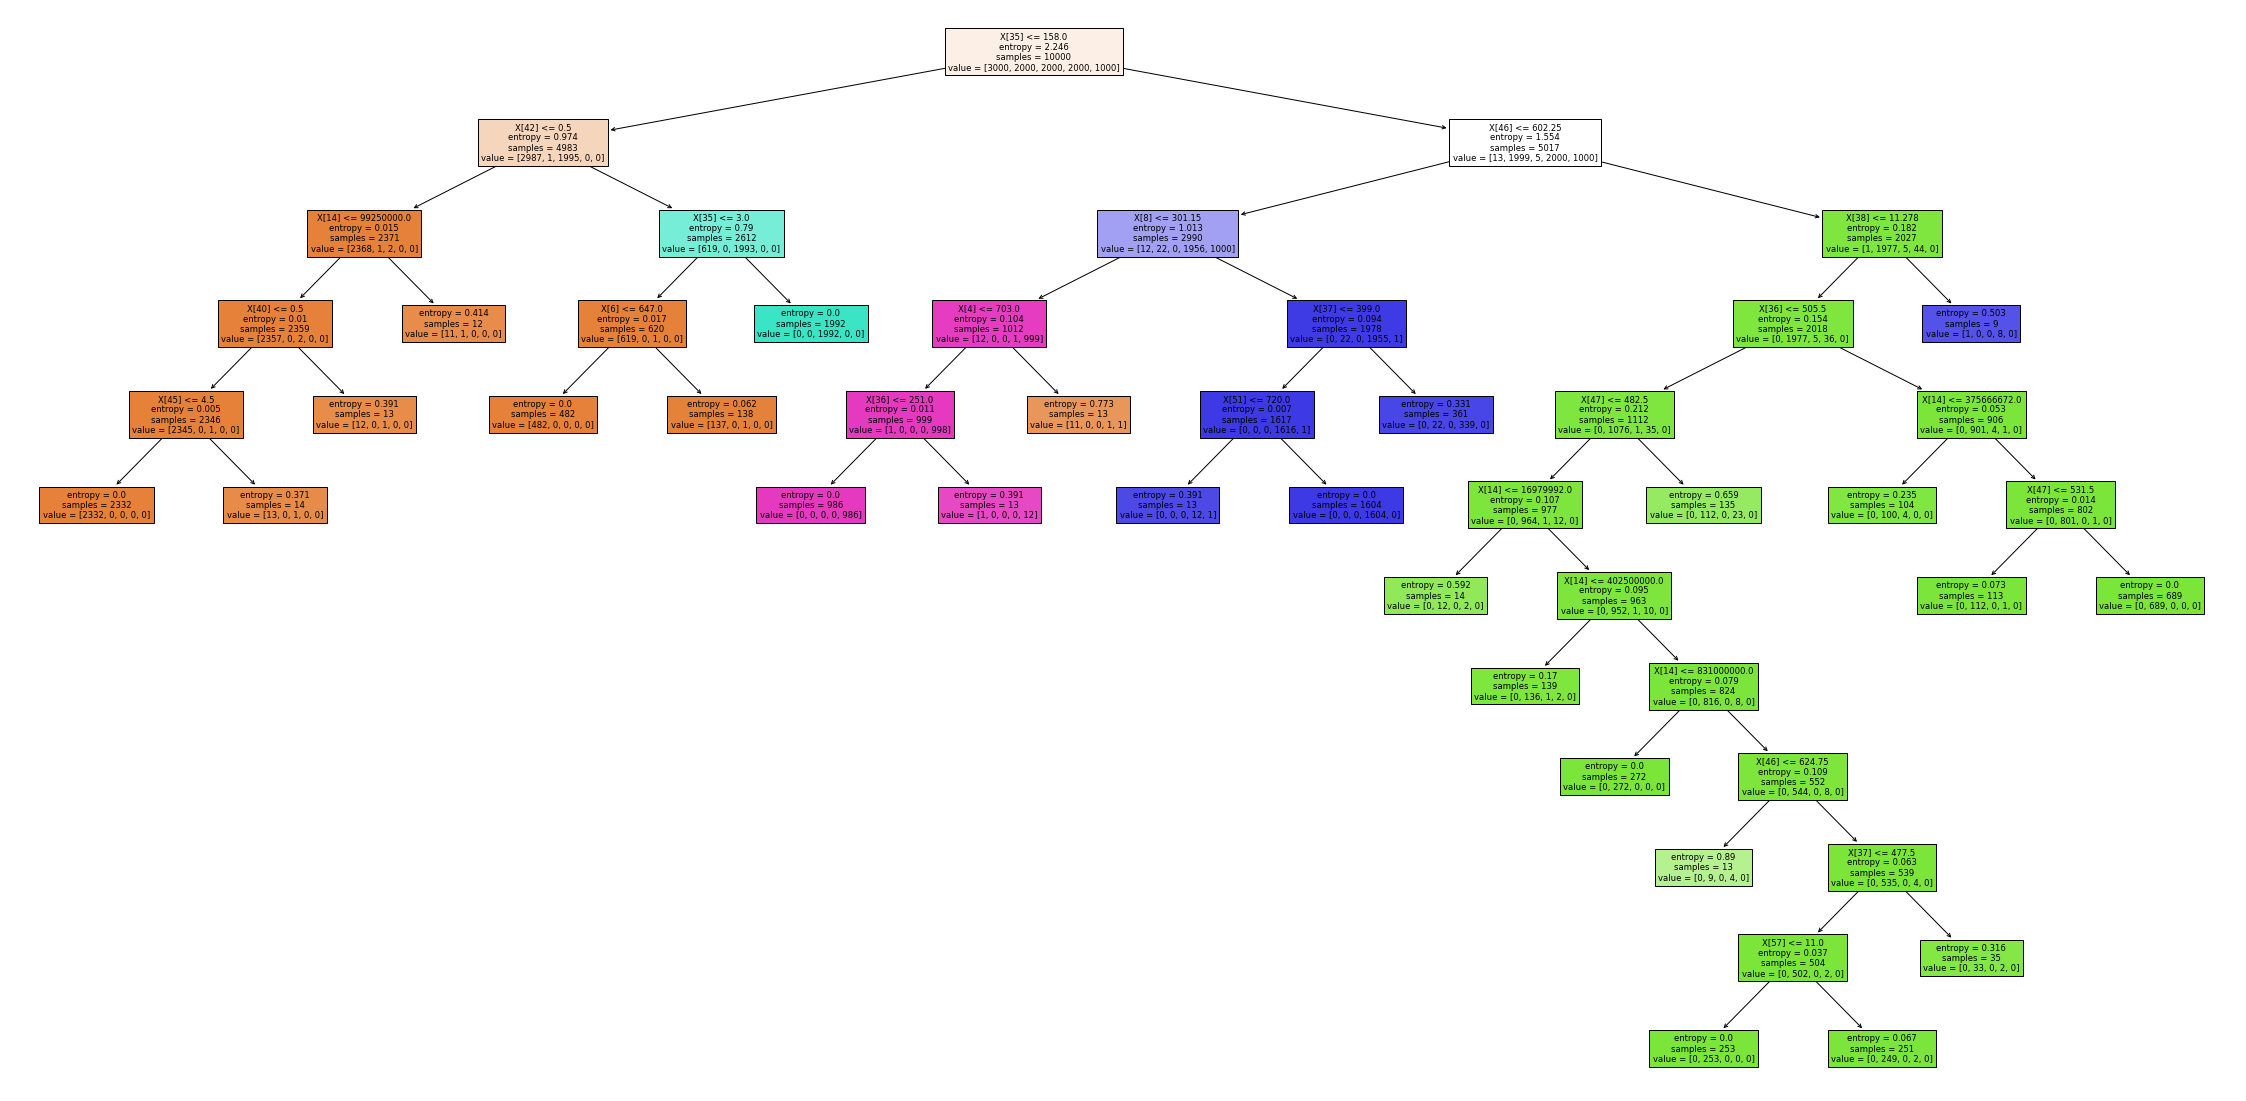

In [45]:
T = decisionTreeLearner(data[independentCols], data['Label'], 'entropy', 500)
showTree(T)

In [46]:
print ('#Nodes: ', T.tree_.node_count, ', #Leaves: ', T.get_n_leaves())

#Nodes:  49 , #Leaves:  25


## Decision Tree prediction

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data[independentCols], data['Label'], test_size=0.20, random_state=seed)

In [48]:
def decisionTreeF1(X_test, y_test, T):
    from sklearn.metrics import f1_score
    
    y_pred = T.predict(X_test)
    return f1_score(y_test, y_pred, average='weighted')

In [49]:
f1_score = decisionTreeF1 (X_test, y_test, T)
print (f1_score)

0.9924995665611337


## determineDecisionTreekFoldConfiguration

In [50]:
def f1Score_fold(ListXTrain,ListXTest,ListYTrain,ListYTest, featureRank, i, j):
    toplist = topFeatureSelect(featureRank, j)
    fold_configuration = []
            
    for t in range(len(ListXTrain)): #Train & test per i vari fold
        T = decisionTreeLearner(ListXTrain[t][toplist], ListYTrain[t], i, 500)
        f1_score = decisionTreeF1(ListXTest[t][toplist], ListYTest[t], T)
        fold_configuration.append(f1_score)
            
    return (i,j, sum(fold_configuration) / len(fold_configuration) ) #Media f1_score di fold

In [51]:
def determineDecisionTreekFoldConfiguration(ListXTrain,ListXTest,ListYTrain,ListYTest, featureRank):
    m_configuration = [] #Lista di configurazioni (parametro, #feature, f1_score)
       
    for i in ['gini', 'entropy']:
        j=5
        while j <= len(featureRank):
            m_configuration.append(f1Score_fold(ListXTrain,ListXTest,ListYTrain,ListYTest, featureRank, i, j))
            j += 5
        if j-5 < len(featureRank):
            m_configuration.append(f1Score_fold(ListXTrain,ListXTest,ListYTrain,ListYTest, featureRank, i, len(featureRank)))
    
    best = ('', 0, 0)
    for i in range (len(m_configuration)):
        if m_configuration[i][2] > best[2]:
            best = m_configuration[i]
    
    return best

In [52]:
bestIG = determineDecisionTreekFoldConfiguration(ListXTrain,ListXTest,ListYTrain,ListYTest , rankIG)
bestMI = determineDecisionTreekFoldConfiguration(ListXTrain,ListXTest,ListYTrain,ListYTest , rankMI)

In [53]:
if bestIG[2] > bestMI[2]:
    best = bestIG + ('Information Gain',)
else:
    best = bestMI + ('Mutual Info',)
    
print ("La configurazione migliore è la seguente:")
print ("Feature selection: ", best[3])
print ("Criterio: ", best[0])
print ("Numero feature: ", best[1])
print ("Fscore: ", best[2])

La configurazione migliore è la seguente:
Feature selection:  Mutual Info
Criterio:  entropy
Numero feature:  45
Fscore:  0.9929036564851097


## determineDecisionTreekFoldConfiguration on PCA

In [54]:
independentColsPCA = list (pcaData.columns.values)
independentColsPCA.remove('Label')

In [55]:
X=pcaData.loc[:, independentColsPCA];
y=pcaData['Label']
folds=5
ListXTrainPCA,ListXTestPCA,ListYTrainPCA,ListYTestPCA=stratifiedKfold(X,y,folds, seed)

TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [   3    8   11 ... 9980 9981 9991]
TRAIN: [   0    2    3 ... 9993 9996 9998] TEST: [   1    5   12 ... 9995 9997 9999]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [   6   13   24 ... 9985 9989 9990]
TRAIN: [   1    3    4 ... 9997 9998 9999] TEST: [   0    2    7 ... 9984 9992 9993]
TRAIN: [   0    1    2 ... 9995 9997 9999] TEST: [   4    9   14 ... 9986 9996 9998]


In [56]:
print(independentColsPCA)

['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8', 'pc_9', 'pc_10', 'pc_11', 'pc_12', 'pc_13', 'pc_14', 'pc_15', 'pc_16', 'pc_17', 'pc_18', 'pc_19', 'pc_20', 'pc_21', 'pc_22', 'pc_23', 'pc_24', 'pc_25', 'pc_26', 'pc_27', 'pc_28', 'pc_29', 'pc_30', 'pc_31', 'pc_32', 'pc_33', 'pc_34', 'pc_35', 'pc_36', 'pc_37', 'pc_38', 'pc_39', 'pc_40', 'pc_41', 'pc_42', 'pc_43', 'pc_44', 'pc_45', 'pc_46', 'pc_47', 'pc_48', 'pc_49', 'pc_50', 'pc_51', 'pc_52', 'pc_53', 'pc_54', 'pc_55', 'pc_56', 'pc_57', 'pc_58', 'pc_59', 'pc_60', 'pc_61', 'pc_62', 'pc_63', 'pc_64', 'pc_65', 'pc_66']


In [57]:
best_PCA = determineDecisionTreekFoldConfiguration(ListXTrainPCA,ListXTestPCA,ListYTrainPCA,ListYTestPCA, independentColsPCA)

In [58]:
print (best_PCA)

('entropy', 40, 0.971409263149349)


## Addestro l'intero dataset sulla migliore configurazione generale

In [59]:
if best[2] > best_PCA[2]:
    bestABS = best
else:
    bestABS = best_PCA + ('PCA',)
    
print ("La configurazione migliore è la seguente:")
print ("Feature selection: ", bestABS[3])
print ("Criterio: ", bestABS[0])
print ("Numero feature: ", bestABS[1])
print ("Fscore: ", bestABS[2])

La configurazione migliore è la seguente:
Feature selection:  Mutual Info
Criterio:  entropy
Numero feature:  45
Fscore:  0.9929036564851097


In [60]:
if bestABS[3] == 'Information Gain':
    toplist = topFeatureSelect(rankIG, bestABS[1])
elif bestABS[3] == 'Mutual Info':
    toplist = topFeatureSelect(rankMI, bestABS[1])
elif bestABS[3] == 'PCA':
    toplist = topFeatureSelect(independentColsPCA, bestABS[1])

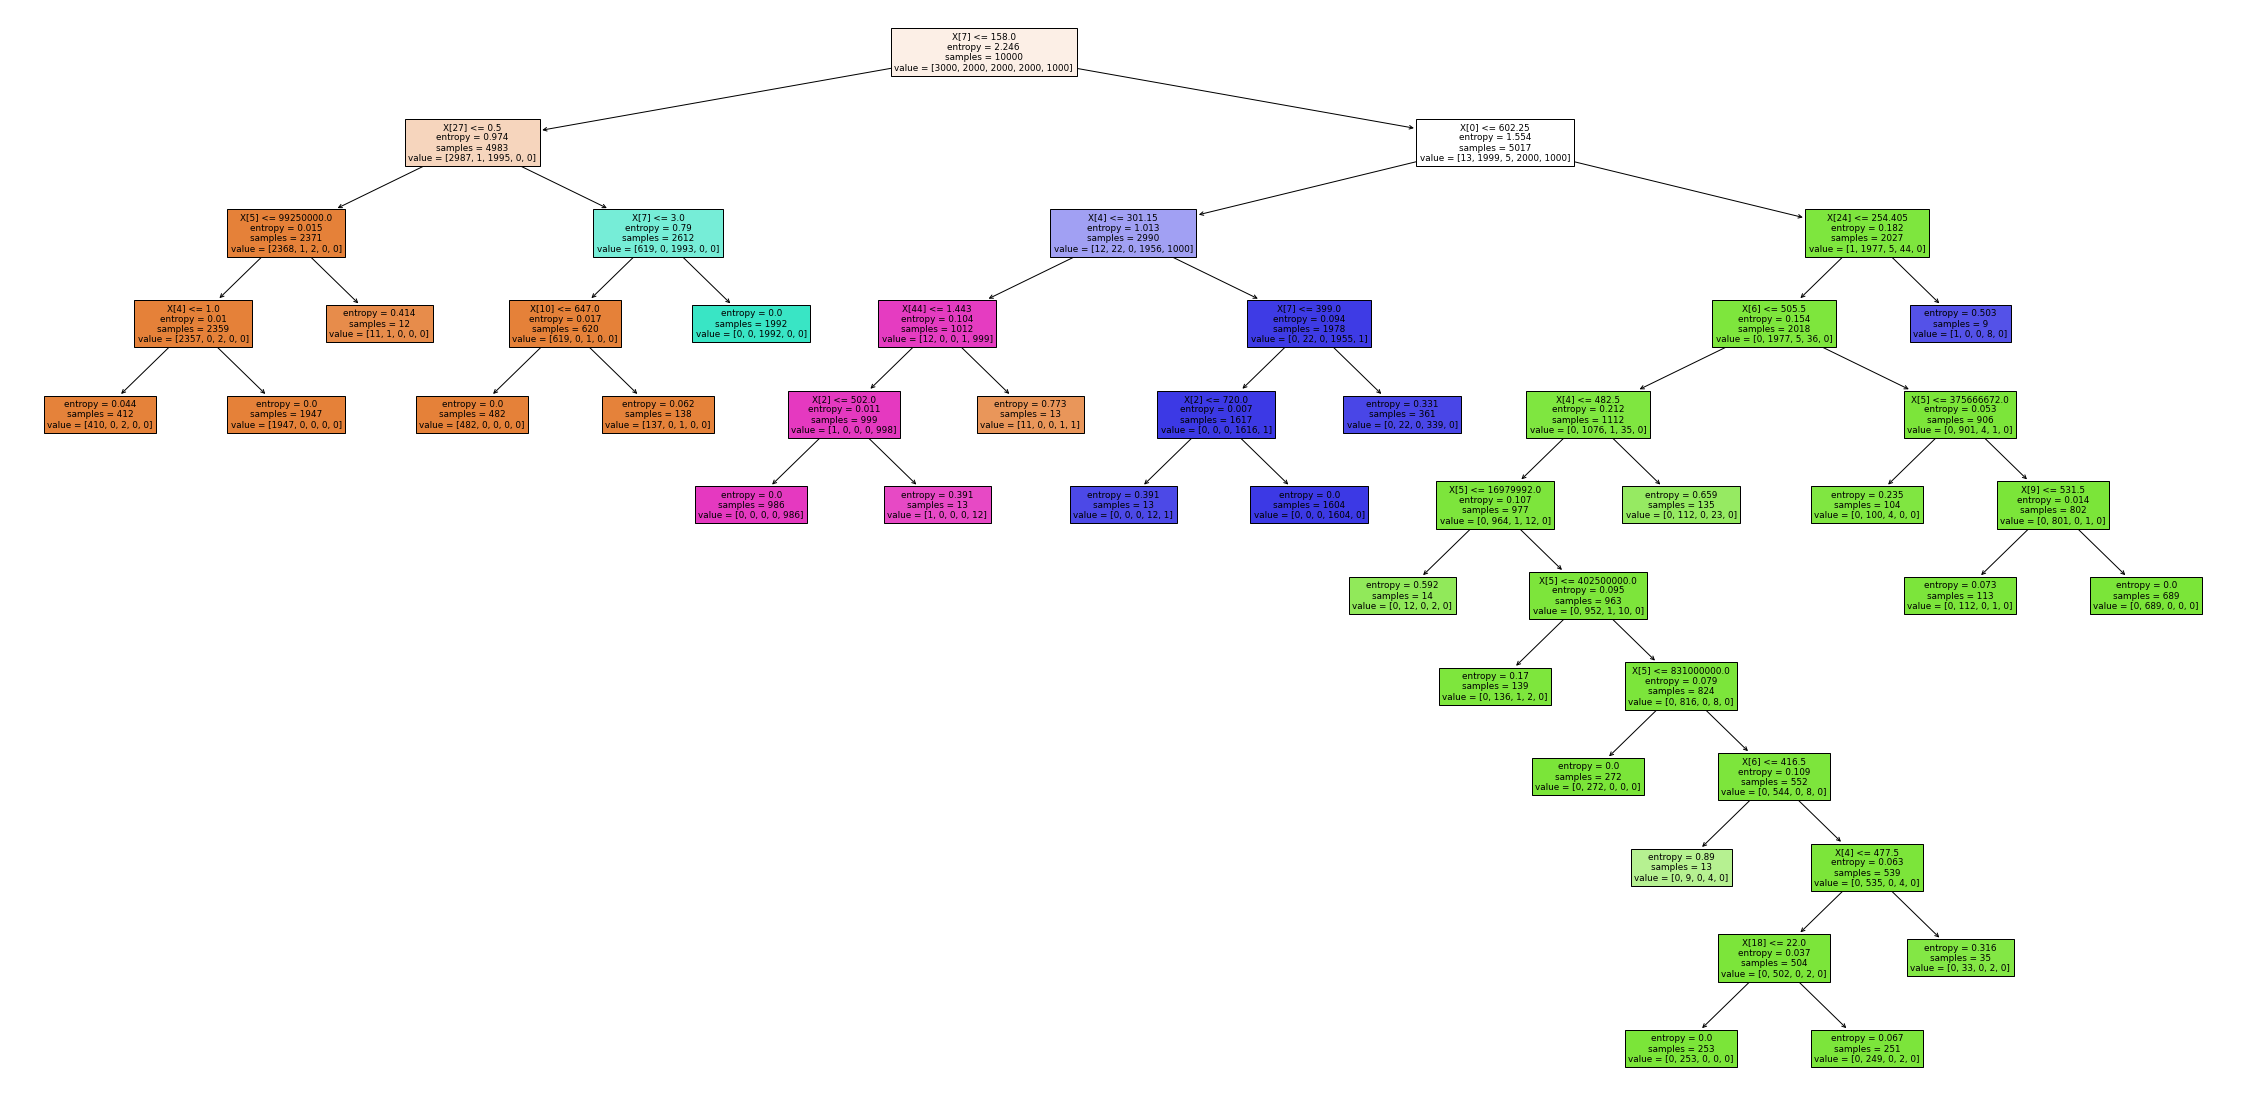

In [61]:
T = decisionTreeLearner(data[toplist], data['Label'], bestABS[0], 500)
showTree(T)

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = T.predict(data[toplist])
print(classification_report(data['Label'], y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.99800   0.99933   0.99867      3000
           1    0.97968   0.98850   0.98407      2000
           2    1.00000   0.99600   0.99800      2000
           3    0.98792   0.98150   0.98470      2000
           4    0.99900   0.99800   0.99850      1000

    accuracy                        0.99280     10000
   macro avg    0.99292   0.99267   0.99279     10000
weighted avg    0.99282   0.99280   0.99280     10000



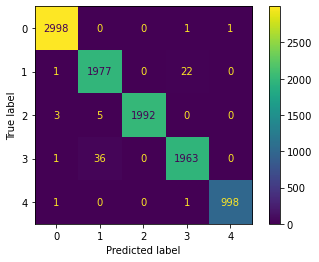

In [63]:
cm = confusion_matrix(data['Label'], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Carico e predict sul test

In [64]:
#testpath = "./testDdosLabelNumeric.csv"
dataTEST = pandas.read_csv("./testDdosLabelNumeric.csv")

In [65]:
print (dataTEST.shape)
dataTEST.drop(columns=removedColumns, inplace=True)
print (dataTEST.shape)

(1000, 79)
(1000, 67)


In [66]:
y_pred = T.predict(dataTEST[toplist])
print(classification_report(dataTEST['Label'], y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.99668   1.00000   0.99834       300
           1    0.96602   0.99500   0.98030       200
           2    1.00000   0.99500   0.99749       200
           3    0.98974   0.96500   0.97722       200
           4    1.00000   0.99000   0.99497       100

    accuracy                        0.99000      1000
   macro avg    0.99049   0.98900   0.98966      1000
weighted avg    0.99016   0.99000   0.99000      1000



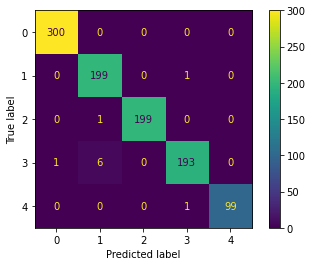

In [67]:
cm = confusion_matrix(dataTEST['Label'], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()